In [6]:
#random mutagenesis engineering 

#given one sequence to work with- run random mutagenesis for X iterations to get a high score and a low score.
#try and engineer the highest score you can 

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.linear_model import LinearRegression
import keras
from keras.models import load_model 
from sklearn import preprocessing
from pickle import dump, load

%matplotlib inline

In [10]:
#3.1 functions

################### Provided functions, you will not need to edit these ##################################3
def plotPredictionChanges(predictionValues, graphTitle):
    #plot the change in predicted values 
    plt.plot(list(range(0, len(predictionValues))), predictionValues)
    plt.xlabel("Iteration")
    plt.ylabel("Predicted MRL")
    plt.title(graphTitle)
    plt.show()
    


In [ ]:
################ You will need to edit these functions for 3.1 ############################

def mutate(sequence):
    #uniform randomly select a position in the sequence.  Mutate it to a new nucleotide
    #return the mutated sequence
    #Hint: take a look at random.randint, random.sample
    #TODO: return the mutated sequence
    return ""

def runLinearRegressionPrediction(sequence, sklearnModel, k):
    #TODO:
    #runs a prediction for a sequence using your pretrained sklearnModel
    #(Don't forget to add 1 column on for bias term in linear regression )
    #x = np.hstack((np.ones((len(x),1)), x))
    return None

def mutagenesis_higher_mrl(starting_sequence, sklearnModel, kmer_dict, number_iterations, k):
    #repeatedly mutate starting sequence and make predictions
    #if the predicted MRL is higher, replace the sequence with the mutate version
    #repeat this for a set number of iterations
    #return the end product sequence and a list of the intermediate predicted values 
    predictions = []
    #make initial prediction
    startingValue = runLinearRegressionPrediction(starting_sequence, sklearnModel,k)
    predictions.append(startingValue)
    for i in range(0, number_iterations):
        #TODO:
        #1) make mutation to starting sequence
        #2) check if the mutant prediction is higher than past prediction & keep the higher 
        #3) append the prediction value to predictions
    return starting_sequence, predictions
    
def get50RandomNTs():
    #TODO: return a 50 nt random sequence 
    #Hint: take a look at random.choice
    return None

In [8]:
#3.1
#TODO: copy your linear regression functions here
#TODO: train your best linear regression model from 2 to use for sequene design

Start sequence: 
TGCATCTGGTAAACGTACTACAATATGTTCAGGAAAAAACAGTCGTACTG
[6.2578125]
End sequence:  TCCATCTGGCAAACTTTCTACCCTATCTTCAGAAAAAAAAAGTCTTACAG
[10.01171875]


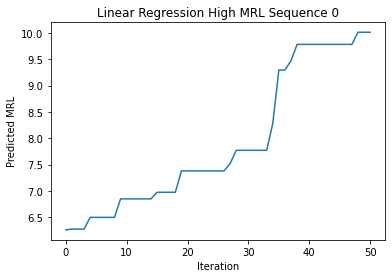

Start sequence: 
CCCGGGTATTTAGCTGCTAACGCAAACTGTGGTTTTTTCGTGATGTTTGC
[5.26171875]
End sequence:  TCCGCGTACTTAACAGCGAACACAAACTCTTGCATTTTCGTGTCGTGAGC
[9.06640625]


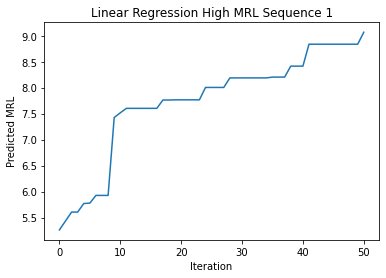

Start sequence: 
CGGGGTCTTTTCGAAGAGCCATGTATATTTCATCAGAGCACTACTCGACG
[7.08984375]
End sequence:  CCGTGTTATTTCGAATAGCCTTGTATATTTCATCAGAGCCCTATTCGAAG
[10.18359375]


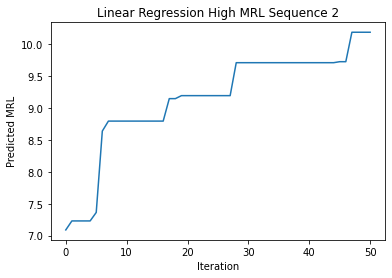

In [15]:
#3.1 
################### Don't need to edit these, just run this cell ####################################
for i in range(0, 3):
    #attempt higher mutation 
    x = get50RandomNTs()
    print ("Start sequence: ")
    print (x)
    end_seq, values = mutagenesis_higher_mrl(x, linearRegressionModel, kmer_dict, 50, 5)
    print (values[0])
    print ('End sequence: ')
    print(end_seq)
    print  (values[-1])
    plotPredictionChanges(values, "Linear Regression High MRL Sequence " + str(i))
    

In [16]:
#3.2
#Now, attempt the same using optimus 5-prime staring with a randomnly generated 50 nt sequence 
#1) download the retrained_main_MRL_model from github (https://github.com/pjsample/human_5utr_modeling/tree/master/modeling/saved_models)


################### Provided functions, you will not need to edit these ##################################3

def one_hot_encode(seq, seq_len=50):
    # Dictionary returning one-hot encoding of nucleotides. 
    nuc_d = {'a':[1,0,0,0],'c':[0,1,0,0],'g':[0,0,1,0],'t':[0,0,0,1], 'n':[0,0,0,0]}
    # Creat empty matrix.
    vectors=np.empty([1,seq_len,4])
    seq = seq.lower()
    a = np.array([nuc_d[x] for x in seq])
    vectors[0] = a
    return vectors

def make_optimus_prediction(seq, model, scaler):
    #one hot encode sequence 
    oneHot = one_hot_encode(seq)
    # Make predictions
    predictions = model.predict(oneHot).reshape(1, -1)
    # scale predictions to true MRL 
    return scaler.inverse_transform(predictions)[0]

def load_scaler():
    return load(open('optimus_scaler.pkl', 'rb'))


In [ ]:
################ You will need to edit these functions for 3.2 ############################

def mutagenesis_higher_mrl_optimus(starting_sequence, model, scaler, number_iterations):
    #TODO: modify your function from before to use one_hot_encode, make_optimus_prediction 
    #output: return your end sequence, a list of the predicted value for each iteration
    predictions = []
    
    return starting_sequence, predictions

In [17]:
#3.2
#load downloaded keras model 
################### Don't need to edit these, just run this cell ####################################
kerasModelName = "retrained_main_MRL_model.hdf5"
model = load_model(kerasModelName)

In [18]:
#get scaler for the optimus model 
################### Don't need to edit these, just run this cell ####################################
scaler = load_scaler()

Start sequence: 
CTGGCAGTGTCTTTCGCCCCGTGTAGTCGATAATATCAGCGGCATTTAGT
7.461041
End sequence:  CTGAAAGTATTTATAGCCCCGTGTAGTCGAAATTATTATCGGCATTTAGT
7.896367


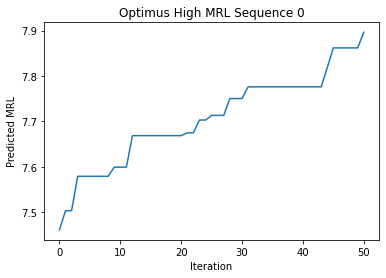

Start sequence: 
TTGGCACAGAATCCGTAAGGCTTCGAGGCACTACATGAACGTGGGACAGC
5.8468895
End sequence:  TTGGTACAGAATACCTAAGGCTTCGAGGTTATATTTGAAAGAGGTAGATC
7.831445


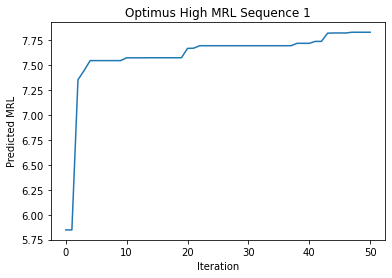

Start sequence: 
AACCCGACATGTGAGTTACGGAGGAGTTAAATGGACCTTCAAATAATCCT
3.384226
End sequence:  GACCGGAATTGAGGTTATCGGACGAATTACATCGACCTTCCATTAAACCT
7.5634828


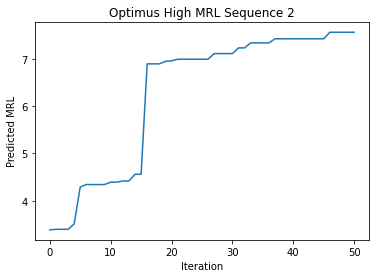

In [19]:
################### Don't need to edit these, just run this cell ####################################
#3.1 
for i in range(0, 3):
    #attempt higher mutation 
    x = get50RandomNTs()
    print ("Start sequence: ")
    print (x)
    end_seq, values = mutagenesis_higher_mrl_optimus(x, model, scaler, 50)
    print (values[0])
    print ('End sequence: ')
    print (end_seq)
    print  (values[-1])
    plotPredictionChanges(values, "Optimus High MRL Sequence " + str(i))
    